# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import packages for plots etc. 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})
import ipywidgets as widgets # For interactive plots/buttons

# Import your own code
import inauguralproject 

# Question 1

In [3]:
model = inauguralproject.HouseholdSpecializationModelClass()


#a. Create list with values of alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5,1.0,1.5]

df = pd.DataFrame(columns = pd.Index(alpha_list, name="sigma/alpha"), index = pd.Index(sigma_list, name=""))


for i in alpha_list:
    for j in sigma_list:
        model.par.alpha = i
        model.par.sigma = j
        results = model.solve_discrete()
        ratio = results.HF / results.HM
        df.loc[j,i] = f"{ratio:.2f}"

print(df)
#print(tabulate(df, headers = alpha_list, tablefmt = "fancy_grid"))


c:\Users\mveje\projects-2023-alt-andet-end-lige\inauguralproject\inauguralproject.py:83: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/(par.sigma)) + par.alpha*HF**((par.sigma-1)/(par.sigma)))**(par.sigma/(par.sigma-1))


sigma/alpha  0.25  0.50  0.75
                             
0.5          0.55  1.00  1.83
1.0          0.31  1.00  3.25
1.5          0.21  1.00  4.67


# Question 2

Explain your code and procedure

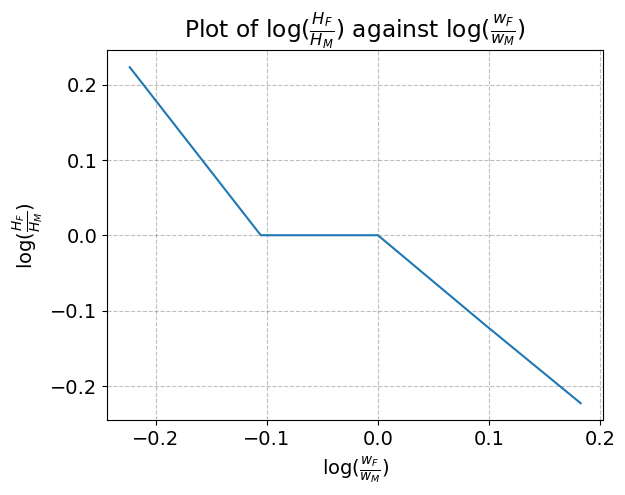

In [28]:
# reset alpha and sigma to baseline values
model.par.alpha = 0.5
model.par.sigma = 1.0

#Create empty lists
logHF_HM = np.zeros(5)
logwF_wM = np.zeros(5)

#solve model and create relevant variables
for i in range(5):
    model.par.wF = model.par.wF_vec[i]
    results = model.solve_discrete()
    logHF_HM[i] = np.log( results.HF/ results.HM )
    logwF_wM[i] = np.log(model.par.wF_vec[i])


# create the figure
fig = plt.figure()

# plot
ax = fig.add_subplot(1,1,1)

ax.plot(logwF_wM,logHF_HM)

ax.set_title("Plot of " + r'$\log(\frac{H_F}{H_M})$' + " against " r'$\log(\frac{w_F}{w_M})$')
ax.set_xlabel(r'$\log(\frac{w_F}{w_M})$')
ax.set_ylabel(r'$\log(\frac{H_F}{H_M})$');

plt.show()

# Question 3

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.